<div style="background: linear-gradient(135deg, #0d1117 0%, #161b22 100%); padding: 30px; border-radius: 15px; border: 2px solid #58a6ff;">
<h1 style="color: #58a6ff; text-align: center; font-size: 2.5em;">🍴 Fork() & Exec() System Calls + Threading Issues 🧵</h1>
<h3 style="color: #8b949e; text-align: center;">Bhai Style Deep Dive into Process Creation & Replacement</h3>
<p style="color: #3fb950; text-align: center; font-size: 1.2em;"><em>"Ek Process se Bachche Paida Karna aur Dusre ko Replace Karna - Samjho Asaan Bhasha Mein!"</em></p>
</div>

<div style="background-color: #161b22; border-left: 5px solid #3fb950; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h2 style="color: #3fb950;">🎬 The Hook - Kahani Shuru!</h2>

**To haan ji kaise hai aap sab? Aaj ke iss lecture mein hum fodne wale hai Fork aur Exec System Calls... aur phir Threading ke Issues!**

To kabhi socha hai aapne ki agar tumhare paas ek **robot** hai jo koi kaam kar raha hai, aur suddenly tumhe **do robots chahiye** jo bilkul same kaam karein? 🤖🤖

Ya phir tumhe **ek robot ke andar naya software dalna hai** bina robot badal ke?

Yahi scene hai **Fork** aur **Exec** ka bhai! Chalo samjhte hai...

</div>

<div style="background-color: #1c1e24; border: 2px dashed #f0883e; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 10px;">
<h2 style="color: #f0883e;">⏪ FLASHBACK - "Yaad Hai Bhai?" Section</h2>

**Lekin aage badhne se pehle, yaad hai bhai kuch basic concepts? Agar bhool gaye ho to tension nahi, fatafat revise kar lete hain...**

</div>

<div style="background-color: #161b22; border-left: 5px solid #a371f7; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #a371f7;">📞 Yaad Hai? #1: System Calls Kya Hote Hai?</h3>

**Analogy Time - Restaurant Waiter! 🍽️**

Socho tum ek fancy restaurant mein ho. Tum directly kitchen mein jaake khana nahi bana sakte (security issues bhai!). To tum kya karte ho? **Waiter ko bulate ho!**

- **Tum (User Program)** = Customer
- **Kitchen (Hardware/OS Core)** = Restricted Area
- **Waiter (System Call)** = Beech ka aadmi jo tumhari request le jaata hai

**System Call = Ek special request jo User Program Operating System ko bhejta hai kuch kaam karwane ke liye!**

Jaise:
- File kholni hai? → `open()` system call
- Process banana hai? → `fork()` system call
- Naya program load karna hai? → `exec()` system call

</div>

<div style="background-color: #161b22; border-left: 5px solid #a371f7; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #a371f7;">🧵 Yaad Hai? #2: Process vs Thread</h3>

**Analogy - WhatsApp Group vs Individual Chats! 📱**

Imagine karo:

- **Process** = Poora WhatsApp App (with all its memory, data, resources)
- **Thread** = Individual conversations/chats running inside that app

Ek Process ke andar **multiple Threads** ho sakte hain, aur sab apna apna kaam karte hain but **resources share** karte hain!

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #0d1117; padding: 15px; border-radius: 8px; color: #58a6ff;">
┌─────────────────────────────────────┐
│           PROCESS (App)             │
│  ┌─────────┐ ┌─────────┐ ┌───────┐  │
│  │ Thread1 │ │ Thread2 │ │Thread3│  │
│  │  (Chat  │ │  (Chat  │ │ (Chat │  │
│  │   #1)   │ │   #2)   │ │  #3)  │  │
│  └─────────┘ └─────────┘ └───────┘  │
│      Shared Memory & Resources      │
└─────────────────────────────────────┘
</pre>

**Key Point:** Threads are PART of a Process. Ek process = multiple threads!

</div>

<div style="background-color: #161b22; border-left: 5px solid #a371f7; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #a371f7;">👨‍👩‍👧 Yaad Hai? #3: Parent & Child Process</h3>

**Simple Funda:**

- **Parent Process** = Jo process nayi process banata hai (Baap)
- **Child Process** = Jo nayi process banti hai (Bachcha)

Jab tum Chrome open karte ho, wo ek process hai. Jab Chrome nayi tab ke liye alag process banata hai, wo **child process** ban jaati hai!

**Process ID (PID)** = Har process ka unique Aadhar Card number! 🆔

</div>

<div style="background-color: #0d1117; border: 3px solid #58a6ff; padding: 25px; color: #c9d1d9; margin: 20px 0; border-radius: 12px;">
<h2 style="color: #58a6ff; text-align: center;">🎯 AB ASLI MASALA SHURU - Fork() System Call</h2>
</div>

<div style="background-color: #161b22; border-left: 5px solid #3fb950; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #3fb950;">🍴 Fork() - The Xerox Machine of Processes!</h3>

**Analogy Time - Xerox/Photocopy Machine! 📄**

Bhai, socho tumhare paas ek important **document** hai (Process). Ab tumhe iska **exact duplicate** chahiye. Tum kya karte ho? **Xerox karwa lete ho!**

**Fork() = Process ka Xerox Machine!**

Jab `fork()` call hota hai:
1. Original process ka **exact copy** ban jaata hai
2. Original = **Parent Process** (tumhara original document)
3. Copy = **Child Process** (Xerox copy)
4. Dono ke **contents SAME** hote hain
5. But **PID DIFFERENT** hota hai (alag Aadhar card)

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #0d1117; padding: 15px; border-radius: 8px; color: #3fb950;">
                    fork()
                      |
                      v
┌─────────────────────────────────────────────┐
│                                             │
│    ┌──────────────┐    ┌──────────────┐     │
│    │   PARENT     │    │    CHILD     │     │
│    │  Process     │    │   Process    │     │
│    │              │    │              │     │
│    │  PID: 5837   │    │  PID: 5838   │     │
│    │              │    │              │     │
│    │  Content:    │    │  Content:    │     │
│    │  "Hello"     │    │  "Hello"     │     │
│    │  (SAME!)     │    │  (SAME!)     │     │
│    └──────────────┘    └──────────────┘     │
│                                             │
│         SAME Content, DIFFERENT PID!        │
└─────────────────────────────────────────────┘
</pre>

</div>

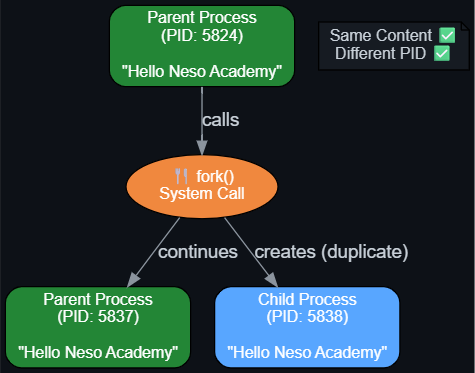

<div style="background-color: #161b22; border-left: 5px solid #f0883e; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #f0883e;">💻 Code Example - Fork() in Action (Linux C Program)</h3>

**Note:** Ye Linux-specific hai bhai! Windows mein exactly aise nahi chalega.

```c

#include <stdio.h>
#include <unistd.h>

int main() {
    fork();  // Yahan Xerox ho gaya!
    printf("Hello Neso Academy, PID = %d\n", getpid());
    return 0;
}
```

**Output:**
```
Hello Neso Academy, PID = 5837
Hello Neso Academy, PID = 5838
```

**Dekha?** Printf **2 baar** print hua! Kyunki fork ke baad **2 processes** ho gayi - Parent aur Child!

</div>

<div style="background-color: #161b22; border-left: 5px solid #f85149; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #f85149;">🧮 Multiple Forks - Maths Time!</h3>

**Sawaal:** Agar **3 fork()** calls hain, to kitni baar print hoga?

**Formula: 2^n processes banenge (jahan n = number of forks)**

```c
fork();  // Fork 1
fork();  // Fork 2  
fork();  // Fork 3
printf("Hello!");
```

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #0d1117; padding: 15px; border-radius: 8px; color: #f85149;">
                         P1 (Original)
                          |
            Fork 1:       |
                    ┌─────┴─────┐
                    P1          P2
                    |           |
            Fork 2: |           |
                 ┌──┴──┐     ┌──┴──┐
                 P1    P3    P2    P4
                 |     |     |     |
            Fork 3:
              ┌──┴──┐ ... (har ek se 2 bante hain)
              P1   P5
              
Total = 2^3 = 8 Processes!
</pre>

**Answer: 8 baar print hoga!** Har process ka **alag PID** hoga!

</div>

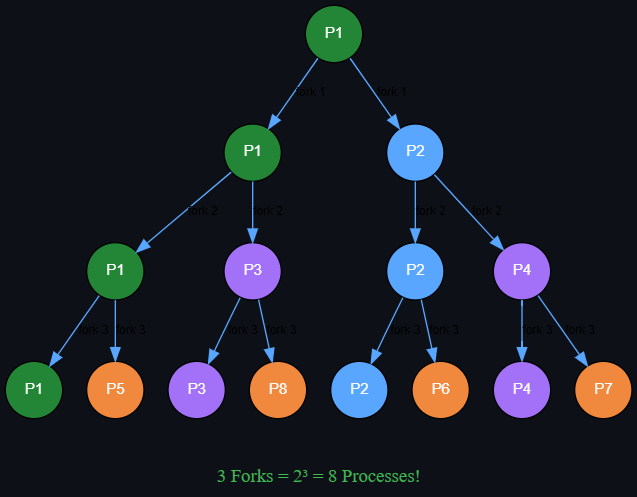

<div style="background-color: #0d1117; border: 3px solid #a371f7; padding: 25px; color: #c9d1d9; margin: 20px 0; border-radius: 12px;">
<h2 style="color: #a371f7; text-align: center;">🔄 AB DOOSRA CONCEPT - Exec() System Call</h2>
</div>

<div style="background-color: #161b22; border-left: 5px solid #a371f7; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #a371f7;">🔄 Exec() - Soul Transplant for Processes!</h3>

**Analogy Time - Body mein Nayi Aatma! 👻**

Imagine karo ek **robot body** hai (Process with PID). Ab tumhe uss body mein **naya software/soul** dalna hai, but body (PID) same rahegi!

**Exec() = Process ka Soul Transplant!**

Jab `exec()` call hota hai:
1. **Purana program REPLACE** ho jaata hai
2. **Naya program** load ho jaata hai (jo parameter mein diya)
3. **PID SAME** rehta hai (body same hai)
4. **Content DIFFERENT** ho jaata hai (nayi aatma)
5. **ALL threads** replace ho jaate hain!

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #0d1117; padding: 15px; border-radius: 8px; color: #a371f7;">
                     exec(new_program)
                           |
                           v
┌────────────────┐              ┌────────────────┐
│   BEFORE       │              │    AFTER       │
│                │              │                │
│  PID: 5962     │   -------->  │  PID: 5962     │
│                │   REPLACE!   │                │
│  Program:      │              │  Program:      │
│  "ex1.c"       │              │  "ex2.c"       │
│  (Old Soul)    │              │  (New Soul)    │
└────────────────┘              └────────────────┘

        SAME PID, DIFFERENT Content!
</pre>

</div>

<div style="background-color: #161b22; border-left: 5px solid #f0883e; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #f0883e;">💻 Code Example - Exec() in Action</h3>

**File 1: ex1.c (Starting Point)**
```c

#include <stdio.h>
#include <unistd.h>

int main() {
    printf("PID of ex1.c = %d\n", getpid());
    
    char *args[] = {"Hello", "Neso", "Academy", NULL};
    
    execv("./ex2", args);  // Yahan Soul Transplant!
    
    printf("Back to ex1.c\n");  // Ye KABHI print nahi hoga!
    return 0;
}
```

**File 2: ex2.c (New Program)**
```c
#include <stdio.h>
#include <unistd.h>

int main() {
    printf("We are in ex2.c now!\n");
    printf("PID of ex2.c = %d\n", getpid());
    return 0;
}
```

**Output (when running ex1):**
```json
PID of ex1.c = 5962
We are in ex2.c now!
PID of ex2.c = 5962
```

**Notice:** 
- "Back to ex1.c" **kabhi print nahi hua!** 
- Kyunki exec() ke baad ex1 ka existence hi khatam ho gaya!
- PID **same** hai (5962) - body same, soul change!

</div>

<div style="background-color: #161b22; border: 2px solid #58a6ff; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #58a6ff;">🆚 Fork vs Exec - Quick Comparison Table</h3>

| Feature | Fork() 🍴 | Exec() 🔄 |
|---------|-----------|----------|
| **Kya karta hai?** | Duplicate/Copy banata hai | Replace karta hai |
| **Process ID** | DIFFERENT (naya PID) | SAME (purana PID) |
| **Content** | SAME (exact copy) | DIFFERENT (naya program) |
| **Analogy** | Xerox Machine | Soul Transplant |
| **Result** | 2 processes chalti hain | 1 process, naye content ke saath |

</div>

<div style="background-color: #0d1117; border: 3px solid #f85149; padding: 25px; color: #c9d1d9; margin: 20px 0; border-radius: 12px;">
<h2 style="color: #f85149; text-align: center;">⚠️ THREADING ISSUES - Asli Problem Yahan Hai!</h2>
</div>

<div style="background-color: #161b22; border-left: 5px solid #f85149; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #f85149;">🤔 The Big Problem - Fork + Threads = Confusion!</h3>

**Scenario Samjho:**

Tum ek **joint family** (Process) mein ho jahan **5 log** (Threads) rehte hain. Ab ek member decide karta hai ki **"Hum naya ghar lenge!"** (Fork call).

**Sawaal: Naye ghar mein kaun jayega?**
- Option A: **Sirf wo member** jo decision liya? (Only calling thread)
- Option B: **Poori family** duplicate hogi? (All threads)

**Yahi Threading Issue hai bhai!**

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #0d1117; padding: 15px; border-radius: 8px; color: #f85149;">
       BEFORE fork()                    AFTER fork() - WHICH ONE?
                                    
┌─────────────────────┐          Option A:            Option B:
│      PROCESS        │          (Single Thread)      (All Threads)
│  ┌───┐ ┌───┐ ┌───┐  │                                
│  │T1 │ │T2 │ │T3 │  │    ┌─────────────┐      ┌─────────────────┐
│  └───┘ └───┘ └───┘  │    │   CHILD     │      │     CHILD       │
│    |                │    │  ┌───┐      │      │ ┌───┐┌───┐┌───┐ │
│    v                │    │  │T1 │      │      │ │T1 ││T2 ││T3 │ │
│  fork() called      │    │  └───┘      │      │ └───┘└───┘└───┘ │
│  by T1              │    │(Only caller)│      │  (All copied)   │
└─────────────────────┘    └─────────────┘      └─────────────────┘
</pre>

</div>

<div style="background-color: #161b22; border-left: 5px solid #3fb950; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #3fb950;">✅ Solution - 2 Versions of Fork!</h3>

**UNIX Systems ne smart solution nikala - 2 Types of Fork!**

| Version | Kya Karta Hai | Analogy |
|---------|---------------|----------|
| **Fork Version 1** | Sirf calling thread duplicate | Akela member naye ghar jaata hai |
| **Fork Version 2** | Saare threads duplicate | Poori family naye ghar shift |

</div>

<div style="background-color: #161b22; border-left: 5px solid #f0883e; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #f0883e;">🤷 Kab Kaunsa Fork Use Karein?</h3>

**Case 1: Jab Fork ke turant baad Exec() aata hai**

```json
fork();   // Duplicate bana
exec();   // Turant replace kar do
```

**Answer: Sirf CALLING THREAD duplicate karo!**

**Kyun?** Agar saare threads duplicate karoge, aur phir turant exec() se sab replace ho jayenge... to duplicate karne ka kya fayda tha? **Bekaar ki mehnat!**

Jaise: Poori family naye ghar shift kari, aur next day ghar tod diya! 🏠💥 Time waste!

---

**Case 2: Jab Fork ke baad Exec() NAHI aata**

```json
fork();   // Duplicate bana
// ... kuch aur kaam karo, exec nahi hai
```

**Answer: SAARE THREADS duplicate karo!**

**Kyun?** Matlab tumhe actually duplicate chahiye tha kaam karne ke liye. Saari family ki zaroorat hai naye ghar mein!

</div>

<div style="background-color: #161b22; border-left: 5px solid #a371f7; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #a371f7;">🔄 Exec() + Threads = Simple Case!</h3>

**Good News:** Exec() ke saath koi confusion nahi!

Jab bhi **koi bhi thread** exec() call kare:

**POORA PROCESS REPLACE ho jaata hai - INCLUDING ALL THREADS!**

Matlab ek member ne bola "Hum sab Mars pe shift ho rahe hain!" - poori family chali gayi, ghar bhi change! 🚀

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #0d1117; padding: 15px; border-radius: 8px; color: #a371f7;">
    BEFORE exec()                      AFTER exec(new_program)
                                    
┌─────────────────────┐              ┌─────────────────────┐
│      PROCESS        │              │   NEW PROCESS       │
│      PID: 100       │              │   PID: 100 (SAME!)  │
│  ┌───┐ ┌───┐ ┌───┐  │              │                     │
│  │T1 │ │T2 │ │T3 │  │   ------->   │   Completely New    │
│  └───┘ └───┘ └───┘  │   REPLACE    │   Program Content   │
│                     │   ALL!       │   (Old threads gone)│
│   exec() by T2      │              │                     │
└─────────────────────┘              └─────────────────────┘
</pre>

</div>

<div style="background-color: #0d1117; border: 3px solid #3fb950; padding: 25px; color: #c9d1d9; margin: 20px 0; border-radius: 12px;">
<h2 style="color: #3fb950; text-align: center;">📋 Complete Decision Flowchart</h2>

<pre style="white-space: pre; font-family: monospace; overflow-x: auto; background-color: #161b22; padding: 20px; border-radius: 8px; color: #58a6ff;">
                    Thread calls fork()
                           |
                           v
              ┌────────────────────────┐
              │  Kya exec() TURANT     │
              │  baad mein call        │
              │  hone wala hai?        │
              └───────────┬────────────┘
                          |
             ┌────────────┴────────────┐
             |                         |
            YES                        NO
             |                         |
             v                         v
  ┌──────────────────────┐  ┌──────────────────────┐
  │  Sirf CALLING        │  │  SAARE THREADS       │
  │  THREAD duplicate    │  │  duplicate karo      │
  │  karo                │  │                      │
  │                      │  │                      │
  │  (Kyunki exec sab    │  │  (Actually kaam      │
  │   replace karega     │  │   karna hai          │
  │   anyway!)           │  │   duplicate ke       │
  │                      │  │   saath)             │
  └──────────────────────┘  └──────────────────────┘
</pre>

</div>

<div style="background-color: #161b22; border: 2px solid #58a6ff; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #58a6ff;">🐧 Linux Specific Note</h3>

**Yaad Rakhna:**

- Fork() aur Exec() primarily **Linux/UNIX** systems ke liye hain
- Windows mein exactly same nahi chalenge
- GCC compiler use hota hai Linux mein C programs compile karne ke liye

**Commands (Linux Terminal):**
```bash
gcc filename.c -o outputname    # Compile karo
./outputname                     # Run karo
```

**Pro Tip:** Agar OS deeply samajhna hai, **Linux seekho** - open source hai, andar dekh sakte ho! 🐧

</div>

<div style="background: linear-gradient(135deg, #161b22 0%, #0d1117 100%); border: 3px solid #3fb950; padding: 25px; color: #c9d1d9; margin: 20px 0; border-radius: 12px;">
<h2 style="color: #3fb950; text-align: center;">🎯 WRAP UP - Moral of the Story</h2>

### Fork() = Xerox Machine 📄
**"Duplicate banao, PID alag, content same!"**

### Exec() = Soul Transplant 👻  
**"Content replace karo, PID same!"**

### Threading Issue = Family Decision 👨‍👩‍👧‍👦
**"Fork ke baad exec hai? Sirf caller jaye. Nahi hai? Poori family jaye!"**

---

<p style="text-align: center; font-size: 1.3em; color: #58a6ff;">
<strong>One-Liner Summary:</strong><br>
"Fork = Photocopy (different ID, same stuff), Exec = Makeover (same ID, new stuff), Threading mein fork + exec = smart choice banao!"</p>

</div>

<div style="background-color: #161b22; border-left: 5px solid #f0883e; padding: 20px; color: #c9d1d9; margin: 20px 0; border-radius: 8px;">
<h3 style="color: #f0883e;">📝 Quick Revision Card</h3>

| Concept | Kya Yaad Rakhna Hai |
|---------|--------------------|
| **Fork()** | Duplicate process, Different PID, Same content |
| **Exec()** | Replace process, Same PID, Different content |
| **n forks** | 2^n processes banti hain |
| **Exec + Threads** | Poora process replace (all threads gone) |
| **Fork + Exec immediately** | Only calling thread duplicate |
| **Fork without Exec** | All threads duplicate |

</div>

<div style="background-color: #0d1117; padding: 20px; border-radius: 10px; border: 2px solid #8b949e; text-align: center;">
<p style="color: #8b949e; font-size: 1.1em;">Bas bhai! Itna samajh gaye to Threading Issues mein aur koi problem nahi aayegi! 🚀</p>
<p style="color: #58a6ff;"><strong>Next Topic:</strong> More Threading Issues (Signal Handling, Thread Pools, etc.)</p>
<p style="color: #3fb950;">"Concepts clear, future secure!" ✌️</p>
</div>